In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

# Notebook for analysing molecules
- Can search for and visualize a specific molecule
- Can analyse a random subset of all molecules in a molecular DB

## Calculate a series of properties for a series of SMILES strings using RDKit
- properties:
    - No. Heavy atoms
    - Molecular weight
    - No. rotatable bonds

In [2]:
from rdkit.Chem import Draw, Descriptors
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [3]:
molecules = {'carbon dioxide': 'C(=O)=O',
             'n-butane': 'CCCC',
             'n-hexane': 'CCCCCC',
             'n-heptane': 'CCCCCCC',
             'n-octane': 'CCCCCCCC',
             'ethanol': 'CCO',
             'para-xylene': 'Cc1ccc(C)cc1',
             'meta-xylene': 'Cc1cccc(C)c1',
             'toluene': 'CC1=CC=CC=C1',
             'napthalene': 'C1=CC=C2C=CC=CC2=C1'}

In [14]:
for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    # mol weight
    MW = Descriptors.ExactMolWt(mol)
    # no. rotatable bonds
    NRB = Descriptors.rdMolDescriptors.CalcNumRotatableBonds(mol)
    # no. heavy atoms
    NHA = mol.GetNumHeavyAtoms()
    # logP without Hs
    logP = Descriptors.MolLogP(mol, includeHs=True)
    # logP with Hs
    logPH = Descriptors.MolLogP(mol, includeHs=False)
    print('----------')
    print(name)
    print('MW:', MW)
    print('No. rotatable bonds:', NRB)
    print('No. Heavy atoms:', NHA)
    print('logP', logP, 'logP-H', logPH)
    print("({}, {}, {})".format(MW, NHA, NRB))

----------
carbon dioxide
MW: 43.98982924
No. rotatable bonds: 0
No. Heavy atoms: 3
logP -0.5835 logP-H -0.5835
(43.98982924, 3, 0)
----------
n-butane
MW: 58.078250319999995
No. rotatable bonds: 1
No. Heavy atoms: 4
logP 0.5764 logP-H 1.8064
(58.078250319999995, 4, 1)
----------
n-hexane
MW: 86.109550448
No. rotatable bonds: 3
No. Heavy atoms: 6
logP 0.8646 logP-H 2.5866000000000007
(86.109550448, 6, 3)
----------
n-heptane
MW: 100.12520051199999
No. rotatable bonds: 4
No. Heavy atoms: 7
logP 1.0087000000000002 logP-H 2.976700000000002
(100.12520051199999, 7, 4)
----------
n-octane
MW: 114.14085057599999
No. rotatable bonds: 5
No. Heavy atoms: 8
logP 1.1528 logP-H 3.3668000000000022
(114.14085057599999, 8, 5)
----------
ethanol
MW: 46.041864812
No. rotatable bonds: 0
No. Heavy atoms: 3
logP -0.3487 logP-H -0.0014000000000000123
(46.041864812, 3, 0)
----------
para-xylene
MW: 106.07825032
No. rotatable bonds: 0
No. Heavy atoms: 8
logP 1.07344 logP-H 2.30344
(106.07825032, 8, 0)
-------

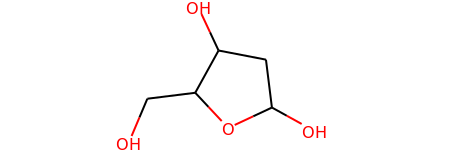

In [170]:
Chem.MolFromSmiles('OCC1OC(O)CC1(O) ')

## Visualize a specific Molecule
- includes search by name function

In [15]:
from rdkit.Chem import Draw, Descriptors
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from ercollect.PUBCHEM_IO import get_logP_from_name, get_complexity_from_name, get_IUPAC_from_name
from ercollect.molecule import yield_molecules, load_molecule
directory = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [118]:
# Search
for j, i in enumerate(yield_molecules(directory=directory)):
    if i.name == '(R)-3-Hydroxybutanoate':
        break
#     try:
#         if i.KEGG_ID == "C11476" or 'C11476' in i.KEGG_ID:
#             print(i.name, i.pkl)
# #             break
#     except AttributeError:
#         pass

In [155]:
i.name, i.pkl

('(R)-3-Hydroxybutanoate',
 '/home/atarzia/psp/molecule_DBs/atarzia/ATRS_122.gpkl')

In [36]:
## known pkl
pkl = '/home/atarzia/psp/molecule_DBs/atarzia/ATRS_37.gpkl'
m = load_molecule(filename=pkl)

loading: /home/atarzia/psp/molecule_DBs/atarzia/ATRS_37.gpkl


In [37]:
print(m.SMILES, '-------', m.name, '-------', m.iupac_name) # , '-------', m.InChiKey)

[S] ------- C00087 ------- hydrogen sulfide


In [30]:
# print(m.SMILES, '-------', m.name, '-------', m.iupac_name, '-------', m.InChiKey, '-------', m.logP, '-------', m.logS)

In [31]:
# m.InChi = 'InChI=1S/C5H10O5/c6-1-3(8)5(10)4(9)2-7/h1,3-5,7-10H,2H2/t3-,4-,5+/m0/s1'
# m.InChiKey = 'PYMYPHUHKUWMLA-VAYJURFESA-N'
# m.SMILES = 'C([C@@H]([C@@H]([C@H](C=O)O)O)O)O'

In [38]:
Chem.GetFormalCharge(m.mol) != 0

False

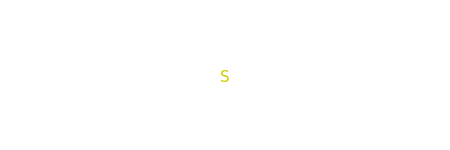

In [39]:
m.mol

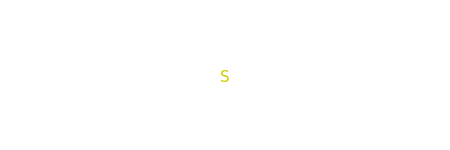

In [40]:
Chem.MolFromSmiles(m.SMILES)

In [35]:
m.KEGG_ID

'C05684'

In [26]:
# m.KEGG_ID = 'C00283'
# m.iupac_name = 'Poly-beta-hydroxybutyrate'
# m.note = 'polymer'

In [154]:
m.save_object(m.pkl)

In [163]:
m.XlogP = m.complexity = m.Synth_score = m.logP = None

In [275]:
A = [i for i in m.rs_pkls if 'KEGG' in i or 'ATLAS' in i]
for i in A:
    print('rm '+i)

rm sRS-3_1_3_24-KEGG-R00805.gpkl
rm sRS-3_1_3_24-KEGG-R06211.gpkl
rm sRS-3_1_2_XX-ATLAS-rat127396.gpkl
rm sRS-3_1_3_XX-ATLAS-rat127861.gpkl
rm sRS-3_2_1_XX-ATLAS-rat128794.gpkl
rm sRS-2_4_1_14-KEGG-R00766.gpkl
rm sRS-2_4_1_14-KEGG-R06073.gpkl
rm sRS-2_4_1_329-KEGG-R10987.gpkl
rm sRS-3_2_1_26-KEGG-R03921.gpkl


In [27]:
m.__dict__

{'DB': 'KEGG',
 'DB_ID': 'C05200',
 'DB_list': ['KEGG'],
 'InChi': None,
 'KEGG_ID': 'C05200',
 'SMILES': 'CC(C)=CCC/C(C)=C/CC/C(C)=C/CC/C(C)=C/CC/C(C)=C/CC/C(C)=C/Cc1cc(C(=O)O)cc(O)c1O',
 'Synth_score': 3.3919715827717667,
 'XlogP': 11.9,
 'cirpy_done': False,
 'complexity': 971,
 'iupac_name': None,
 'logP': 10.93719999999999,
 'logS': -11.573401521956868,
 'max_diam': None,
 'mid_diam': None,
 'min_diam': None,
 'mol': <rdkit.Chem.rdchem.Mol at 0x7ff18951bd18>,
 'name': 'C05200',
 'pkl': '/home/atarzia/psp/molecule_DBs/atarzia/ATRS_700.gpkl',
 'rat_1': None,
 'rat_2': None,
 'role': 'product',
 'rs_pkls': ['sRS-XX_XX_XX_XX-KEGG-R06865.gpkl',
  'sRS-2_1_1_114-KEGG-R04711.gpkl'],
 'translated': False}

#### Modify attributes of this molecule
 - done on 24/11/18 for oxidized ABTS

In [111]:
m.__dict__

{'DB': 'SABIO',
 'DB_ID': '20867',
 'DB_list': ['SABIO'],
 'InChi': None,
 'KEGG_ID': '',
 'PubChemID': None,
 'SMILES': 'CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3[N+](C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC',
 'Synth_score': None,
 'XlogP': None,
 'cID': '20867',
 'chebiID': None,
 'cirpy_done': True,
 'complexity': None,
 'iupac_name': None,
 'logP': None,
 'max_diam': 0,
 'mid_diam': 0,
 'min_diam': 0,
 'mol': <rdkit.Chem.rdchem.Mol at 0x7f5344908148>,
 'name': "Oxidized 2,2'-azino-bis(3-ethylbenzthiazoline-6-sulfonic acid)",
 'pkl': '/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5399.gpkl',
 'rat_1': 0,
 'rat_2': 0,
 'role': 'product',
 'rs_pkls': ['sRS-1_11_1_7-SABIO-2218.gpkl',
  'sRS-1_11_1_7-SABIO-19982.gpkl',
  'sRS-1_11_1_7-SABIO-19983.gpkl',
  'sRS-1_11_1_7-SABIO-19984.gpkl',
  'sRS-1_11_1_7-SABIO-2219.gpkl',
  'sRS-1_11_1_7-SABIO-2220.gpkl',
  'sRS-1_11_1_7-SABIO-2221.gpkl',
  'sRS-1_11_1_7-SABIO-23679.gpkl',
  'sRS-1_11_1-SABIO-58994.gpkl'],
 'translated': False}

In [109]:
m.InChi = None
m.SMILES = 'CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3[N+](C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC'
mol = Chem.MolFromSmiles(m.SMILES)
s = Standardizer()
smol = s.standardize(mol)
for atom in smol.GetAtoms():
    print(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetNumRadicalElectrons())
m.mol = smol
m.logP = None
m.Synth_score = None
m.save_object(m.pkl)

C 0 0
C 0 0
N 0 0
C 0 0
C 0 0
C 0 0
C 0 0
C 0 0
C 0 0
S 0 0
O 0 0
O 0 0
O -1 0
S 0 0
C 0 0
N 0 0
N 0 0
C 0 0
N 1 1
C 0 0
C 0 0
S 0 0
C 0 0
C 0 0
C 0 0
C 0 0
S 0 0
O 0 0
O 0 0
O -1 0
C 0 0
C 0 0


In [13]:
m.mol

NameError: name 'm' is not defined

## Standardize and test Smiles and InChi conversions

In [124]:
from molvs import Standardizer, standardize_smiles
mol = Chem.MolFromSmiles('CCN1C2=C(C=C(C=C2)S(=O)(=O)[O-])SC1=NN=C3[N+](C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC')
# mol = Chem.inchi.MolFromInchi('InChI=1S/C18H18N4O6S4/c1-3-21-13-7-5-11(31(23,24)25)9-15(13)29-17(21)19-20-18-22(4-2)14-8-6-12(32(26,27)28)10-16(14)30-18/h5-10H,3-4H2,1-2H3,(H,23,24,25)(H,26,27,28)/q+1/p-2',
#                               treatWarningAsError=True)  # removeHs=False, sanitize=False, 
# an RDKit moleculer standardizer
s = Standardizer()
smol = s.standardize(mol)

# standardizer used in my code
# ssmiles = standardize_smiles('CCN\\1C2=C(C=C(C=C2)S(=O)(=O)[O-])S/C1=N\\N=C\\3/[N+](C4=C(S3)C=C(C=C4)S(=O)(=O)[O-])CC')
# smol = Chem.MolFromSmiles(ssmiles)

for atom in smol.GetAtoms():
    print(atom.GetSymbol(), atom.GetFormalCharge(), atom.GetNumRadicalElectrons())

C 0 0
C 0 0
N 0 0
C 0 0
C 0 0
C 0 0
C 0 0
C 0 0
C 0 0
S 0 0
O 0 0
O 0 0
O -1 0
S 0 0
C 0 0
N 0 0
N 0 0
C 0 0
N 1 1
C 0 0
C 0 0
S 0 0
C 0 0
C 0 0
C 0 0
C 0 0
S 0 0
O 0 0
O 0 0
O -1 0
C 0 0
C 0 0


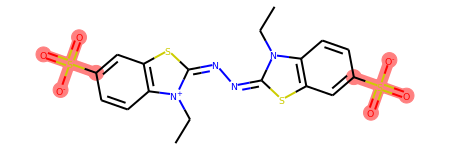

In [125]:
smol

## Draw a target molecule

In [3]:
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem

In [6]:
smiles = 'CCCCCCCC(=O)OC1=CC=C(C=C1)[N+](=O)[O-]'
name = 'p-nitrophenyl_octanoate'
drawing_dir = '/home/atarzia/psp/documents/psp_paper/figures/'
MOL = Chem.MolFromSmiles(smiles)
Draw.MolToFile(MOL, fileName=drawing_dir+name+'.svg')

## Visualize a random subset of molecules in molecule database

In [34]:
import molecule as mol
from molecule import molecule
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [35]:
mol_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [36]:
mol_list = [i for i in mol.yield_molecules(directory=mol_db_dir)]

----
doing 1 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7099.pkl
----
doing 2 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4366.pkl
----
doing 3 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11801.pkl
----
doing 4 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1350.pkl
----
doing 5 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3249.pkl
----
doing 6 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9746.pkl
----
doing 7 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_12393.pkl
----
doing 8 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2772.pkl
----
doing 9 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_455.pkl
----
doing 10 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8197.pkl
----
doing 11 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_780.pkl
----
doing 12 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_11621.pkl
----
doing 13 of 13548
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9840.pkl
----
doing 14 of 135

3-iodobenzaldehyde
BRENDA
['BRENDA']
no pubchemID
no CHEBIID
C1=CC(=CC(=C1)I)C=O
Phe-Ala
BRENDA
['BRENDA']
no pubchemID
73630
C[C@H](NC(=O)[C@@H](N)Cc1ccccc1)C(O)=O
Gly-Met-Met
SABIO
['SABIO']
no pubchemID

CSCCC(N=C(O)C(CCSC)N=C(O)CN)C(=O)O
Pancratistatin
KEGG
['KEGG']
no pubchemID
7906
O[C@@H]1[C@@H](O)[C@H](O)[C@H]2[C@@H](NC(=O)c3c(O)c4OCOc4cc23)[C@@H]1O
xanthurenate
KEGG
['KEGG']
no pubchemID
71201
Oc1cccc2c(O)cc(nc12)C([O-])=O
Nigakilactone B
KEGG
['KEGG']
no pubchemID
80861
CO[C@H]1[C@H](C)[C@@H]2CC(=O)O[C@@H]3C[C@H]4[C@H](C)C=C(OC)C(=O)[C@]4(C)[C@@H]([C@@H]1O)[C@]23C
2-oxopropyl-CoM
KEGG
['KEGG']
no pubchemID
15881
CC(=O)CSCCS(=O)(=O)O
1-O-hexadecanoyl-2-O-[(Z)-octadec-9-enoyl]-sn-glycerol 3-diphosphate
KEGG
['KEGG']
no pubchemID
34087
CCCCCCCC/C=C\CCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCCCCCCCCC)COP(=O)(O)OP(=O)(O)O
(24E)-3alpha,7alpha,12alpha-trihydroxy-5beta-cholest-24-enoyl-CoA
BKMS
['BKMS', 'BRENDA']
no pubchemID
no CHEBIID
CC(CCC=C(C)C(=O)SCCNC(=O)CCNC(=O)C(C(C)(C)COP(=O)([O-])OP

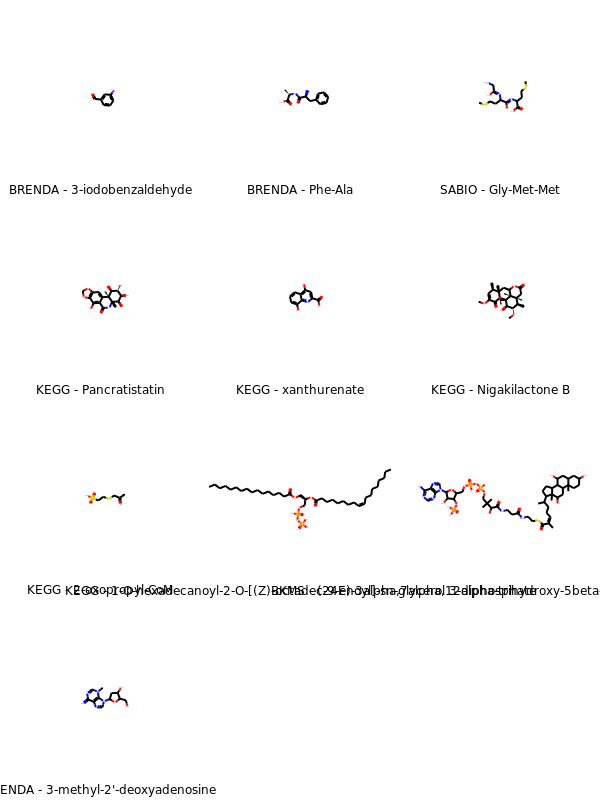

In [37]:
smiles_list = []
n_list = []
for ch in np.arange(10):
    m = random.choice(mol_list)
    print(m.name)
    n_list.append(m.DB+' - '+m.name)
    print(m.DB)
    print(m.DB_list)
    try:
        print(m.PubchemId)
    except AttributeError:
        print('no pubchemID')
    try:
        print(m.chebiID)
    except AttributeError:
        print('no CHEBIID')
    try:
        print(m.SMILES)
        smiles_list.append(m.SMILES)
    except AttributeError:
        print('no SMILES')
    
    #input('done')
    
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

## Search for some attribute for all molecules in my database


In [445]:
from molecule import molecule, yield_molecules

In [446]:
mol_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [57]:
count = 0
for m in yield_molecules(directory=mol_db_dir):
    count += 1
    if m.logP is not None and m.logP > 15:
        print(m.name, m.pkl)
#     try:
#         if ' ' in m.KEGG_ID:
#             print(m.pkl, m.name, m.KEGG_ID, m.rs_pkls[0], m.role)
#     except AttributeError:
#         pass        

ditrans,polycis-undecaprenyl diphosphate /home/atarzia/psp/molecule_DBs/atarzia/ATRS_1265.gpkl
ditrans,polycis-undecaprenyl phosphate /home/atarzia/psp/molecule_DBs/atarzia/ATRS_1266.gpkl
(Kdo)2-lipid A (E. coli) /home/atarzia/psp/molecule_DBs/atarzia/ATRS_2296.gpkl
diphospho heptaacyl lipid A /home/atarzia/psp/molecule_DBs/atarzia/ATRS_2578.gpkl
diphospho hexaacyl lipid A /home/atarzia/psp/molecule_DBs/atarzia/ATRS_2579.gpkl
ditrans,polycis-undecaprenol /home/atarzia/psp/molecule_DBs/atarzia/ATRS_2817.gpkl
N-acetyl-D-glucosaminyl-1-diphospho-ditrans,polycis-undecaprenol /home/atarzia/psp/molecule_DBs/atarzia/ATRS_2839.gpkl
alpha-D-galactosyl undecaprenyl diphosphate /home/atarzia/psp/molecule_DBs/atarzia/ATRS_2867.gpkl
Trioleoylglycerol /home/atarzia/psp/molecule_DBs/atarzia/ATRS_33.gpkl
Gentiobiosyl-caldarchaeol /home/atarzia/psp/molecule_DBs/atarzia/ATRS_3393.gpkl
caldarchaeol /home/atarzia/psp/molecule_DBs/atarzia/ATRS_3394.gpkl
4-deoxy-4-formamido-alpha-L-arabinopyranosyl ditrans,

## Manually set some attribute for all molecules in my database
- Used on 28/11/18 to set all size attributes to None so they could be recalculated with new parameters

In [27]:
from molecule import molecule, yield_molecules

In [28]:
mol_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [96]:
count = 0
for m in yield_molecules(directory=mol_db_dir):
    count += 1
    if m.logP == 'charged':
#     m.mid_diam = None
#     m.min_diam = None
#     m.max_diam = None
#     m.rat_1 = None
#     m.rat_2 = None
        m.logP = None
        m.logS = None
        m.XlogP = None
    m.save_object(m.pkl)